# Ini

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re

In [5]:
df = pd.read_excel('../ini_data/datamon.xlsx')
df.sample(10)

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик
1255,ТОКОПРИЕМНИК ТКЭ 16-5 УХЛ2,2018-08-20 00:00:00,2018-07-09,42.0,320.0,Республика Карелия,1,1.619344e+05,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3685
3854,Вал 3532.10.01.011,2021-07-20 00:00:00,2021-03-26,116.0,160.0,Республика Карелия,1,1.121019e+05,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 45 дней с да...,NaN,4014
1106,Рычаг 3711.01.02.050,2018-05-05 00:00:00,2018-03-30,36.0,220.0,Республика Карелия,1,1.617358e+04,NaN,NaN,3961
2111,Звездочка 3588.35.01.004,2020-08-20 00:00:00,2020-03-30,143.0,145.0,Республика Карелия,2,4.371975e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011
3296,Коромысло 11078.02.010,10.11.2021,NaT,NaN,180.0,Республика Карелия,1,4.490446e+05,NaN,NaN,4014
2382,Коромысло 3711.21.00.200,2021-01-11 00:00:00,2020-12-30,12.0,180.0,Республика Карелия,1,4.442185e+05,NaN,NaN,3961
1997,Коромысло 3519.21.00.023,2020-02-17 00:00:00,2019-12-09,70.0,220.0,Мурманская область,3,1.687898e+05,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 15 дней с да...,NaN,3952
3897,Втулка 1080.05.312,2021-07-05 00:00:00,2021-03-05,122.0,120.0,Вологодская область,4,5.382166e+03,NaN,NaN,3989
357,ПРОУШИНА 41.55.04.131 НИЖНЕГО ТРОСА,2016-09-25 00:00:00,2016-07-13,74.0,180.0,Республика Карелия,8,1.617834e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011
1729,Подшипник седловой 3546.03.04.000-02,2020-01-10 00:00:00,2019-02-20,324.0,220.0,Республика Карелия,1,6.911688e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Наименование                                            4015 non-null   object        
 1   Дата поставки                                           4005 non-null   object        
 2   Дата заказа                                             2939 non-null   datetime64[ns]
 3   Срок поставки                                           2939 non-null   float64       
 4   Плановый срок поставки                                  3994 non-null   float64       
 5   Регион                                                  4015 non-null   object        
 6   Объем заказа                                            4015 non-null   int64         
 7   Цена, руб                                               4015

In [7]:
df.describe()

,Срок поставки,Плановый срок поставки,Объем заказа,"Цена, руб",НРП - нерегламентная потребность (внеплановая закупка),Поставщик
count,2939.00000,3994.000000,4015.000000,4.015000e+03,303.0,4015.00000
mean,127.45900,170.007762,7.817186,7.182498e+05,1.0,3900.50411
std,123.42362,88.446546,51.075264,4.395519e+06,0.0,318.22084
min,0.00000,15.000000,1.000000,2.229299e+01,1.0,259.00000
25%,49.00000,90.000000,1.000000,2.101911e+04,1.0,3987.00000
50%,95.00000,180.000000,2.000000,1.121019e+05,1.0,4011.00000
75%,172.00000,220.000000,4.000000,3.589599e+05,1.0,4012.00000
max,807.00000,470.000000,1500.000000,1.649682e+08,1.0,4014.00000


# Names

In [8]:
df.Наименование.nunique()

1008

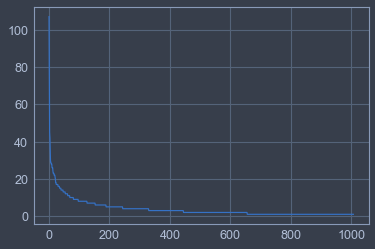

In [14]:
plt.plot(sorted(df.Наименование.value_counts(), reverse=True));

In [34]:
df['Наименование2'] = df.Наименование.apply(lambda s: s.lower().strip().replace("  ", "").replace('.', '-'))

In [35]:
df.head()

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2
0,ШКИВ К МПЭ-350-900 3536.19.00.200,2017-04-10 00:00:00,2015-06-09,671.0,210.0,Республика Карелия,1,3.839490e+04,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,шкив к мпэ-350-900 3536-19-00-200
1,СТРЕЛА 1085.05.00СБ,2015-11-10 00:00:00,2015-08-03,99.0,180.0,Вологодская область,1,2.050955e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,стрела 1085-05-00сб
2,УСТРОЙСТВО КУЭ-3 04УХЛ2,2015-10-27 00:00:00,2015-08-03,85.0,150.0,Вологодская область,1,1.337580e+06,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,устройство куэ-3 04ухл2
3,ВТУЛКА 1080.33.70,2015-08-31 00:00:00,2015-08-03,28.0,30.0,Вологодская область,6,3.439490e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,втулка 1080-33-70
4,ЗУБ КОВША 1085.52.05-1СБ НАПЛАВКА,2015-08-31 00:00:00,2015-08-03,28.0,75.0,Вологодская область,30,6.496815e+03,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,3699,зуб ковша 1085-52-05-1сб наплавка


In [36]:
df.Наименование2.nunique()

956

зуб ковша 1085.52.05-1сб наплавка

зуб 1080.02.10 ковша,с наплавкой

In [69]:
list(df[df.Наименование2.str.contains('зуб ')].Наименование2[:20])

['зуб ковша 1085-52-05-1сб наплавка',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб ковша 1085-52-05-1сб наплавка',
 'зуб 1080-02-10-1сб ковша,с наплавкой',
 'зуб ковша 3711-01-00-001г',
 'зуб 1080-02-10 ковша,с наплавкой',
 'зуб 1080-02-10 ковша,с наплавкой']

In [ ]:
sub_dict = {
    r"(зуб)\s(.*)\s*(ковша)\s*(.+)": r"\1 \3 \2 \4",
    ",* *с наплавкой": " наплавка",
    "венец зубчатый": "венец зубч",
    r"блоки голов-": "блоки голов",
    r"блоки головные": "блоки голов",
    r"блоки отклон-": "блоки отклон",
    r"блок-шестерня(\d)": r"блок-шестерня \1",
    r"блок(\d)": "блок \\1",    # TODO: "блок3"
    r"блок3": "блок 3",
    "блок управления": "блок упр",
    r"блок,": "блок",
    "блоки ": "блок ",
    "блок головной": "блок голов",
    "венец3": "венец 3",
    r"венец(\d)": "венец \\1",
    r"втулка(\d)": "втулка \\1",
    # TODO: "днище"
    r"засов(\d)": "засов \\1",
    r"звено(\d)": "звено \\1",
    r"зуб(\d)": "зуб \\1",
    r"ковш(\d)": "ковш \\1",
    r"колесо(\d)": "колесо \\1",
    r"^([а-яa-z]+)(\d)": "\\1 \\2",
    # TODO: колесо
    "- ": " ",
    "   ": " ",
    "  ": " ",
    " ,": ",",
    r",(\S)": r", \1", 
}

df['Наименование3'] = df.Наименование2

for k, v in sub_dict.items():
    df.Наименование3 = df.Наименование3.apply(lambda s: re.sub(k, v, s))  

In [315]:
group_dict = {
    "амортизатор \d": "амортизатор",
    "барабан \d": "барабан",
    "блок \d": "блок",
    "блок голов": "блок голов",
    "блок трмз": "блок трмз",
    "блок упр": "блок упр",
    "блок-шес": "блок-шестерня",
    "болт \d": "болт",
    "бронь конуса": "бронь конуса",
    "вал \d": "вал",
    "вал веду": "вал ведущий",
    "вал промеж": "вал промежуточный",
    "вал трмз": "вал трмз",
    "вал-шест": "вал-шестерня",
    "вант ": None,
    "венец зубч": "венец зубч",
    "венец \d": "венец",
    "вентилятор": None,
    "винт": None,
    "вкладыш": None,
    "водило": None,
    "втулка \d": "втулка",
    "втулка бронз": None,
    "втулка колеса": None,
    "втулка напорной оси": None,
    "втулка сзсм": None,
    "втулка трубы": None,
    "г/цил": None,
    "гайка": None,
    "джойстик": None,
    "днище": None,
    "засов": None,
    "звездочка": None,
    "звено": None,
    "зуб": None,
    "изолятор": None,
    "клин": None,
    "ковш": None,
    "колесо": None
}

df['Группа'] = None
for k, v in group_dict.items():
    df.Группа = df.apply(
        lambda r: 
        (v if v else k)
        if (
            re.search(k, r.Наименование3) 
            and re.search(k, r.Наименование3).start() == 0 
        )
        else r.Группа,
        axis=1 
    )
    
names_out = df[['Наименование', 'Наименование3', 'Группа']]
names_out.drop_duplicates(subset='Наименование3', inplace=True)
names_out = names_out.sort_values('Наименование3', ascending=True)
names_out.to_excel('tmp.xlsx', index=False)

# l = list(names_out[names_out.str.contains('блок3')].values)[0]
# l

C:\Users\kan\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [305]:
names_out.head(20)

,Наименование,Наименование3,Группа
994,Адаптер Atlas 3363094238,адаптер atlas 3363094238,None
202,АМОРТИЗАТОР 041-55.04.1210,амортизатор 041-55-04-1210,амортизатор
1332,Амортизатор 3546.03.04.012,амортизатор 3546-03-04-012,амортизатор
1224,Аппарат погл. 587100008,аппарат погл 587100008,None
1822,Аппарат погл. ПМКП-110 587100008,аппарат погл пмкп-110 587100008,None
1223,Балка рукояти 3711.38.01.000,балка рукояти 3711-38-01-000,None
996,Баллон Atlas 9779100019,баллон atlas 9779100019,None
1885,Барабан 1085.53.115,барабан 1085-53-115,барабан
414,БАРАБАН 3532.10.04.001,барабан 3532-10-04-001,барабан
1183,Барабан 3537.35.05.000,барабан 3537-35-05-000,барабан


In [291]:
x = re.search('блок \d', "блок 3519-21-00-011")
x.start()

0

In [292]:
"блок 3519-21-00-011".startswith('блок \d')

False

In [261]:
re.sub(r"блок(\d)", "блок \\1", l)

'блок 3519-21-00-008'

In [258]:
for c in l: print(c)

б
л
о
к
3
5
1
9
-
2
1
-
0
0
-
0
0
8


In [254]:
list(names_out)

['адаптер atlas 3363094238',
 'амортизатор 041-55-04-1210',
 'амортизатор3546-03-04-012',
 'аппарат погл 587100008',
 'аппарат погл пмкп-110 587100008',
 'балка рукояти 3711-38-01-000',
 'баллон atlas 9779100019',
 'барабан 1085-53-115',
 'барабан 3532-10-04-001',
 'барабан 3537-35-05-000',
 'барабан 3547-00-04-410',
 'барабан кабельный 3537-35-05-000',
 'барабан3537-35-05-000',
 'барабан3546-00-04-250',
 'блок 1080-02-30 уравнительный',
 'блок 1080-10-45',
 'блок 11077-26-06',
 'блок 3519-21-00-008',
 'блок 3519-21-00-011',
 'блок 3536-03-00-150',
 'блок 3536-03-03-000',
 'блок 3537-03-04-300',
 'блок в сборе 3536-03-00-150',
 'блок голов 3536-03-03-000',
 'блок голов 3537-03-03-000',
 'блок голов 3548-03-03-000',
 'блок голов 3711-03-05-000-01',
 'блок напор-вала 11075-05-300-1 сб',
 'блок отклон 11077-03-500',
 'блок трмз 11077-26-06',
 'блок трмз 3519-21-00-008',
 'блок трмз 3519-21-00-011',
 'блок упр брти юр 2990',
 'блок упр бтов',
 'блок упр був2-00-00-00 оэ',
 'блок упр оэ бцу

In [243]:
l

['блок3519-21-00-008']

In [250]:
df[df.Наименование.str.contains("блок")]

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2,Наименование3
1218,Полублок 3546.02.00.050,2019-04-29 00:00:00,2018-06-18,315.0,320.0,Республика Карелия,1,149498.089172,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3546-02-00-050,полублок 3546-02-00-050
1219,Полублок задний 3546.02.00.001,2019-04-29 00:00:00,2018-06-18,315.0,320.0,Республика Карелия,1,320654.777070,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок задний 3546-02-00-001,полублок задний 3546-02-00-001
1220,Полублок 3546.02.00.050,2019-04-29 00:00:00,2018-06-18,315.0,320.0,Республика Карелия,1,149498.089172,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3546-02-00-050,полублок 3546-02-00-050
1221,Полублок задний 3546.02.00.001,2019-04-29 00:00:00,2018-06-18,315.0,320.0,Республика Карелия,1,320654.777070,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,1.0,4011,полублок задний 3546-02-00-001,полублок задний 3546-02-00-001
1227,Полублок 3546.02.00.050,2019-04-05 00:00:00,2018-06-19,290.0,320.0,Республика Карелия,1,149498.089172,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3546-02-00-050,полублок 3546-02-00-050
1228,Полублок задний 3546.02.00.001,2019-04-05 00:00:00,2018-06-19,290.0,320.0,Республика Карелия,1,320654.777070,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок задний 3546-02-00-001,полублок задний 3546-02-00-001
1468,Полублок 3536.38.00.001,2019-11-15 00:00:00,2018-12-13,337.0,270.0,Республика Карелия,1,220652.229299,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3536-38-00-001,полублок 3536-38-00-001
1523,Полублок 3536.38.00.001,2019-05-31 00:00:00,2018-12-13,169.0,270.0,Республика Карелия,1,220652.229299,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3536-38-00-001,полублок 3536-38-00-001
1534,Полублок 3519.49.00.001,2019-04-30 00:00:00,2018-12-13,138.0,210.0,Республика Карелия,1,117643.949045,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с да...,NaN,4011,полублок 3519-49-00-001,полублок 3519-49-00-001
2032,Полублок 3519.49.00.001,2020-04-20 00:00:00,2020-01-15,96.0,210.0,Мурманская область,4,103184.713376,ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с да...,NaN,4012,полублок 3519-49-00-001,полублок 3519-49-00-001


In [244]:
re.sub(r"блок(\d)", "блок \\1", l[0])

'блок 3519-21-00-008'

In [161]:
df[df.Наименование2.str.contains('зуб') & df.Наименование2.str.contains('ковш')][['Наименование2', 'Наименование3']].sample(10)

,Наименование2,Наименование3
803,зуб ковша 1085-52-05-1сб наплавка,зуб ковша 1085-52-05-1сб наплавка
758,зуб ковша 3711-33-00-006,зуб ковша 3711-33-00-006
3238,зуб ковша 11078-52-002-2см,зуб ковша 11078-52-002-2см
1655,зуб ковша 11078-52-002-2см,зуб ковша 11078-52-002-2см
339,зуб ковша 1085-52-05-1сб наплавка,зуб ковша 1085-52-05-1сб наплавка
3114,зуб ковша 3711-33-00-006,зуб ковша 3711-33-00-006
3240,зуб ковша 11078-52-002-2см,зуб ковша 11078-52-002-2см
199,зуб ковша 1085-52-05-1сб наплавка,зуб ковша 1085-52-05-1сб наплавка
189,"зуб 1080-02-10 ковша,с наплавкой",зуб ковша 1080-02-10 наплавка
374,зуб ковша 3711-01-00-001г,зуб ковша 3711-01-00-001г


In [166]:
names_out

0              шкив к мпэ-350-900 3536-19-00-200
1                            стрела 1085-05-00сб
2                        устройство куэ-3 04ухл2
3                              втулка 1080-33-70
4              зуб ковша 1085-52-05-1сб наплавка
                          ...                   
3964                           рельс 11075-31-13
3966    горловина воронки 2-217904сб мшц 4-5х6-0
3981                       обойма 3711-21-00-100
3998                        ролик 3536-03-06-100
4001                        петля 3504-28-02-005
Name: Наименование3, Length: 956, dtype: object

In [122]:
p1 = re.compile(r'(зуб)\s(.*)\s*(ковша)\s*(.+)')
# p2 = re.compile(r'\1 \3 \2 \4')
re.sub(r'(зуб)\s(.*)\s*(ковша)\s*(.+)', r'\1 \3 \2 \4', df.Наименование3.loc[378])

'зуб ковша 1080-02-10  ,с наплавкой'

# Payment terms

In [42]:
df['Условия платежа'].unique()

array(['ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 45 дней с даты ППС ДЕНЬГИ 100%',
       nan,
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 20 дней с даты перехода права собственности (ППС)  ДЕНЬГИ 100% ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 10 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 80 дней с даты ППС ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100 % в течение 5 дней с даты счета-фактуры  ДЕНЬГИ 100% ',
       'ПРЕДОПЛАТА 100% в течение 10 дней с даты счета на предоплату ',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 15 дней с даты ППС ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 30 дней с даты счета-фактуры ДЕНЬГИ 100%',
       'ПОСЛЕДУЮЩАЯ ОПЛАТА 100% в течение 60 дней с даты счета-фактуры ДЕНЬГИ 100%'],
      dtype=object)

Looks fine. Not touched.

# Delivery dates

In [59]:
df[df['Дата поставки'].isnull()]

,Наименование,Дата поставки,Дата заказа,Срок поставки,Плановый срок поставки,Регион,Объем заказа,"Цена, руб",Условия платежа,НРП - нерегламентная потребность (внеплановая закупка),Поставщик,Наименование2
2402,Редуктор 3555.11.01.000СБ,NaN,NaT,NaN,330.0,Республика Карелия,1,1.496815e+06,NaN,NaN,4014,редуктор3555-11-01-000сб
2403,Редуктор 3555.11.01.000СБ,NaN,NaT,NaN,330.0,Республика Карелия,1,1.624204e+06,NaN,NaN,4012,редуктор3555-11-01-000сб
2414,РУКОЯТЬ ФЛАНЦЕВАЯ 3536.38.00.000СБ,NaN,NaT,NaN,200.0,Республика Карелия,2,1.902548e+06,NaN,NaN,4014,рукоять фланцевая 3536-38-00-000сб
2489,Блок 3536.03.00.150,NaN,NaT,NaN,100.0,Республика Карелия,4,2.675159e+05,NaN,NaN,4014,блок3536-03-00-150
2515,Вал ТРМЗ 3572.05.10.200,NaN,NaT,NaN,220.0,Республика Карелия,10,2.625478e+05,NaN,NaN,4014,вал трмз 3572-05-10-200
2569,Вал 3532.10.01.011,NaN,NaT,NaN,160.0,Республика Карелия,6,1.121019e+05,NaN,NaN,4014,вал3532-10-01-011
2730,Лебедка 3536.08.00.000,NaN,NaT,NaN,330.0,Республика Карелия,1,4.299363e+06,NaN,NaN,4014,лебедка3536-08-00-000
2980,Обойма ТРМЗ 3532.21.00.100СБ,NaN,NaT,NaN,200.0,Республика Карелия,2,2.484076e+05,NaN,NaN,4014,обойма трмз 3532-21-00-100сб
3458,Вал-шестерня Z=12 черт.3537.67.01.023,NaN,NaT,NaN,NaN,Республика Карелия,2,4.757962e+05,NaN,NaN,4014,вал-шестерня z=12 черт-3537-67-01-023
3459,Вал-ведущий черт.3550.05.02.046-02,NaN,NaT,NaN,NaN,Республика Карелия,2,5.095541e+05,NaN,NaN,4014,вал-ведущийчерт-3550-05-02-046-02


Can't use rows with empty delivery date.

In [60]:
df = df[df['Дата поставки'].notnull()]

# Order date

In [61]:
sum(df['Дата заказа'].isnull())

1066

In [62]:
df['Дата заказа'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4010    False
4011    False
4012    False
4013    False
4014    False
Name: Дата заказа, Length: 4005, dtype: bool